In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# read data
df = pd.read_csv('data/comment_data_general_091022_untilarticle5874_corrected.csv', index_col=0)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [2]:
# get rank number, percentile, and time from first comment for comments in all articles
df['time_rank'] = df.groupby('article')['timestamp'].rank(method='min')
df['time_rank_percentile'] = df.groupby('article')['timestamp'].rank(method='min', pct=True)*100
df['timedelta'] = (df['timestamp'] -
                    df.groupby('article')['timestamp'].transform('min')).dt.seconds/60

/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_13617/3810623372.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


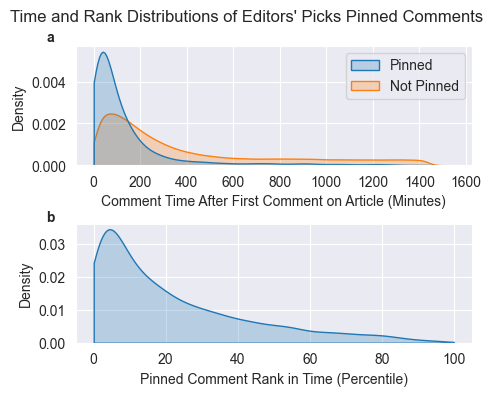

In [3]:
# plot
fig, axs = plt.subplots(2, 1, figsize=(5, 4))

sns.kdeplot(data=df, x='timedelta', hue='pinned_f', fill=True, common_norm=False, hue_order=[1,0], clip=(0,100000), ax=axs[0])
axs[0].set_xlabel('Comment Time After First Comment on Article (Minutes)')
legend = axs[0].get_legend()
legend.set_title('')
legend.texts[0].set_text('Pinned')
legend.texts[1].set_text('Not Pinned')

sns.kdeplot(data=df[df['pinned_f']==1], x='time_rank_percentile', fill=True, clip=(0,100), ax=axs[1])
axs[1].set_xlabel('Pinned Comment Rank in Time (Percentile)')

fig.text(0.1, 0.9, 'a', weight='bold')
fig.text(0.1, 0.45, 'b', weight='bold')
fig.suptitle('Time and Rank Distributions of Editors\' Picks Pinned Comments')
fig.tight_layout()
fig.savefig('figs/pin_time_distributions.pdf', bbox_inches='tight')
fig.savefig('figs/pin_time_distributions.svg', bbox_inches='tight')
fig.show()

In [4]:
# print median values for pinned/not pinned
for f in ['time_rank_percentile', 'timedelta']:
    for p in [0, 1]:
        pinstring = (not bool(p))*'not '
        print(f'Median {f}, {pinstring}pinned', df[df['pinned_f']==p][f].median())


Median time_rank_percentile, not pinned 50.403078104691005
Median time_rank_percentile, pinned 14.414414414414415
Median timedelta, not pinned 233.55
Median timedelta, pinned 65.91666666666667
